# Evaluation Notebook for CNAE Group 11 Experiments

### How to:
#### Use the next code block to upload Locust datasets (or mount your Google Drive) to add data.


1.   exceptions.csv
2.   failures.csv
3.   report.html
4.   requests.csv


## Initial installation

In [22]:
#initial installation
!pip install numpy
!pip install pandas
!pip install matplotlib

In [23]:
# install packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

### Upload files

In [24]:
# from google.colab import files
# uploaded = files.upload()

### Connect Drive

In [25]:
#or connect you drive to add the csv-files
#from google.colab import drive
#drive.mount('/content/drive')

### Reference locally

In [29]:
exceptions = pd.read_csv("Data/exceptions.csv")
failures = pd.read_csv("Data/failures.csv")
requests = pd.read_csv("Data/requests.csv")

# Plots
### Failures: Distribution of Failures per Name

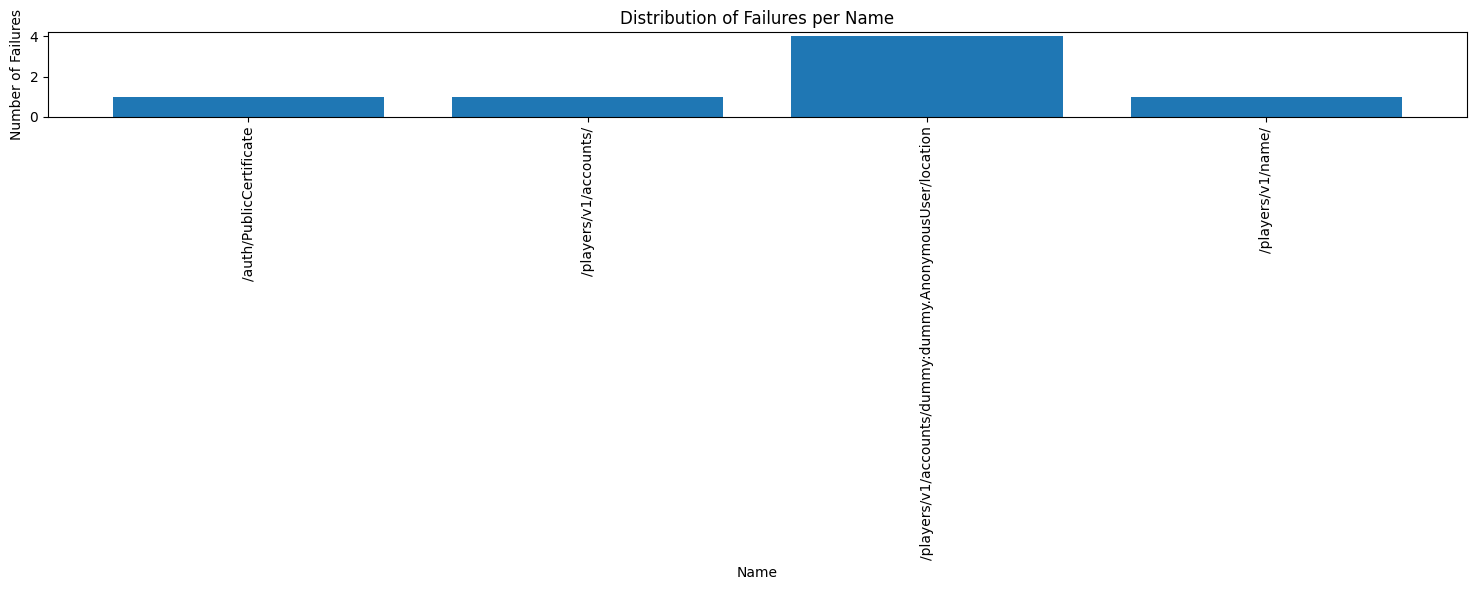

In [30]:
# Group data by 'Name' and sum the 'Occurrences'
failures_grouped_by_name = failures.groupby('Name')['Occurrences'].sum().reset_index()

# Plot histogram for distribution of failures per name
plt.figure(figsize=(15, 6))
plt.bar(failures_grouped_by_name['Name'], failures_grouped_by_name['Occurrences'])
plt.xlabel('Name')
plt.ylabel('Number of Failures')
plt.title('Distribution of Failures per Name')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()



## Requests

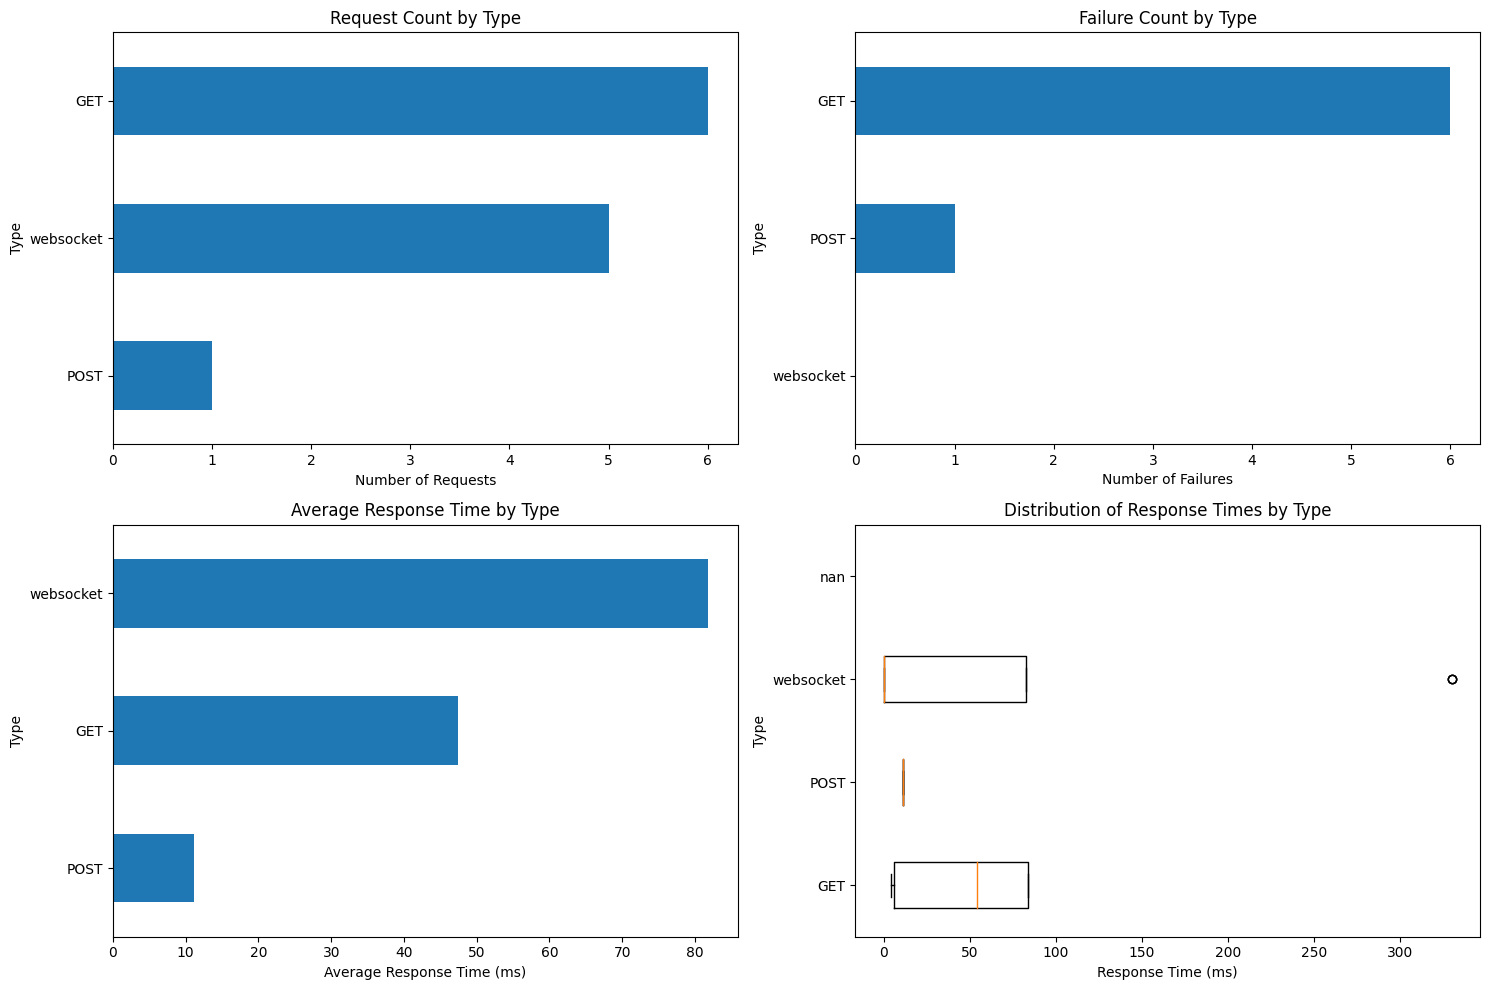

In [31]:
# Set up the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 1. Request Count by Type
requests.groupby('Type')['Request Count'].sum().sort_values().plot(kind='barh', ax=axes[0, 0])
axes[0, 0].set_title('Request Count by Type')
axes[0, 0].set_xlabel('Number of Requests')
axes[0, 0].set_ylabel('Type')

# 2. Failure Count by Type
requests.groupby('Type')['Failure Count'].sum().sort_values().plot(kind='barh', ax=axes[0, 1])
axes[0, 1].set_title('Failure Count by Type')
axes[0, 1].set_xlabel('Number of Failures')
axes[0, 1].set_ylabel('Type')

# 3. Average Response Time by Type
requests.groupby('Type')['Average Response Time'].mean().sort_values().plot(kind='barh', ax=axes[1, 0])
axes[1, 0].set_title('Average Response Time by Type')
axes[1, 0].set_xlabel('Average Response Time (ms)')
axes[1, 0].set_ylabel('Type')

# 4. Distribution of Response Times for Each Type (using 50%, 75% and 95% percentiles)
box_data = [requests[requests['Type'] == type_][['50%', '75%', '95%']].values.flatten() for type_ in requests['Type'].unique()]
axes[1, 1].boxplot(box_data, vert=False, labels=requests['Type'].unique())
axes[1, 1].set_title('Distribution of Response Times by Type')
axes[1, 1].set_xlabel('Response Time (ms)')
axes[1, 1].set_ylabel('Type')

plt.tight_layout()
plt.show()
